#### Importando Bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

#### Pré-Processamento

In [2]:
df = pd.read_csv('carros_aed.csv')

categorical_columns = ['Marca', 'Carro', 'Transmissão']
category_mapping = {}

for col in categorical_columns:
    category_mapping[col] = dict(zip(df[col].unique(), range(len(df[col].unique()))))

for col in categorical_columns:
    df[col] = df[col].map(category_mapping[col])

features = df[['Marca', 'Carro', 'Transmissão','Preço', 'Ano', 'KM Rodado']]

### Classificação com Kmeans

In [3]:

kmeans = KMeans(n_clusters=3)
df['Classificação'] = kmeans.fit_predict(features)

cluster_mapping = {0: 'Barato', 1: 'Mediano', 2: 'Caro'}
df['Classificação'] = df['Classificação'].map(cluster_mapping)

for col in categorical_columns:
    df[col] = df[col].map({v: k for k, v in category_mapping[col].items()})
df[['Marca', 'Carro', 'Preço', 'Ano', 'KM Rodado', 'Classificação']]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Marca,Carro,Preço,Ano,KM Rodado,Classificação
0,Chevrolet,Onix,52900,2019,72000,Barato
1,Honda,CR-V,89000,2012,80000,Barato
2,BMW,Série 3,114900,2015,10,Barato
3,Hyundai,HB20,70900,2018,56000,Barato
4,Chevrolet,Tracker,108900,2020,40000,Barato
...,...,...,...,...,...,...
9855,Fiat,Uno,53100,2021,43071,Barato
9856,Fiat,Uno,53100,2021,42958,Barato
9857,Fiat,Uno,53100,2021,42235,Barato
9858,Fiat,Uno,53100,2021,42167,Barato


### Plot do Kmeans

<ipython-input-4-0358af302c17>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Preço'], df['Ano'], cmap='viridis')


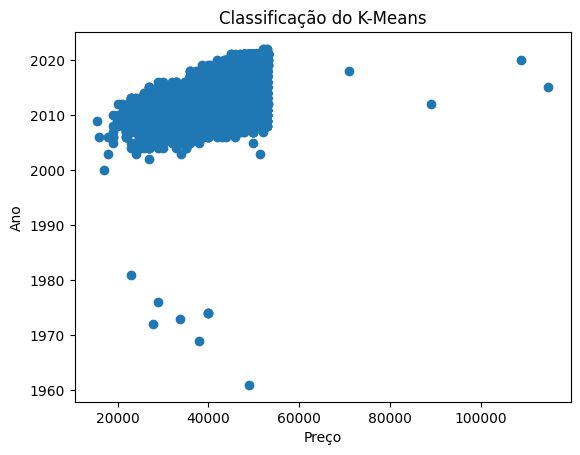

In [4]:
plt.scatter(df['Preço'], df['Ano'], cmap='viridis')
plt.xlabel('Preço')
plt.ylabel('Ano')
plt.title('Classificação do K-Means')
plt.show()

### Métricas de Desempenho

In [5]:
inertia = kmeans.inertia_
print(f'Inércia: {inertia}')

silhouette_avg = silhouette_score(features, df['Classificação'])
print(f'Silhouette Score: {silhouette_avg}')

davies_bouldin = davies_bouldin_score(features, df['Classificação'])
print(f'Davies-Bouldin Index: {davies_bouldin}')

Inércia: 4486508125206.842
Silhouette Score: 0.4900367849030406
Davies-Bouldin Index: 0.6328194693882766


### Preparando os Dados para Regressão

In [6]:
categorical_columns = ['Marca', 'Carro', 'Transmissão']
le_dict = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

X = df[['Marca', 'Carro', 'Transmissão', 'Ano', 'KM Rodado']]
y = df['Preço']

In [7]:
random_states = list(range(1, 1001))
test_sizes = [0.2, 0.3, 0.4]

best_score = float('-inf')
best_random_state = None
best_test_size = None

for random_state in random_states:
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
        model = DecisionTreeRegressor(random_state=random_state)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_random_state = random_state
            best_test_size = test_size

print('Melhor random_state:', best_random_state)
print('Melhor test_size:', best_test_size)

Melhor random_state: 587
Melhor test_size: 0.2


### Treinando o Modelo

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=587)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Métricas de Desempenho

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R-squared): {r2}')

Erro Quadrático Médio (MSE): 14012013.756166188
Coeficiente de Determinação (R-squared): 0.7749624847135782


### Fazendo Previsão com o Modelo de Regressão

In [10]:
y_pred = model.predict(df[['Marca', 'Carro', 'Transmissão', 'Ano', 'KM Rodado']])

for col in categorical_columns:
    df[col] = le_dict[col].inverse_transform(df[col])

df['Preço Predito'] = y_pred

In [11]:
df

,Marca,Carro,Descrição,Preço,Ano,KM Rodado,Transmissão,Cidade,Estado,Classificação,Preço Predito
0,Chevrolet,Onix,Onix 1.0 Joy SPE/4,52900,2019,72000,Manual,Belo Horizonte,MG,Barato,52900.0
1,Honda,CR-V,CR-V 2.0 16V 4X4 EXL (aut),89000,2012,80000,Automático,Vassouras,RJ,Barato,52990.0
2,BMW,Série 3,320i ActiveFlex,114900,2015,10,Automático,Sinop,MT,Barato,114900.0
3,Hyundai,HB20,HB20 1.6 Comfort Plus (Aut),70900,2018,56000,Automático,Taubaté,SP,Barato,70900.0
4,Chevrolet,Tracker,Tracker 1.2 Turbo Premier (Aut),108900,2020,40000,Automático,Belo Horizonte,MG,Barato,108900.0
...,...,...,...,...,...,...,...,...,...,...,...
9855,Fiat,Uno,Uno 1.0 Attractive,53100,2021,43071,Manual,Uberlândia,MG,Barato,53100.0
9856,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42958,Manual,Uberlândia,MG,Barato,51490.0
9857,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42235,Manual,Uberaba,MG,Barato,52295.0
9858,Fiat,Uno,Uno 1.0 Attractive,53100,2021,42167,Manual,Uberaba,MG,Barato,53100.0


### Conclusão

Conseguimos classificar os carros em categorias de preço, tais como Barato, Mediano e Caro, com base em variáveis categóricas específicas, e também somos capazes de prever os valores dos veículos com base nessas variáveis categoricas.

In [12]:
df.to_csv('ml_carros.csv', index=False)